# Analisis de datos(202016908) 
# Henry Cantillo 
#  Dataset Arboles de decisiones - Red Wine Quality

In [110]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [108]:
data.shape

(1599, 12)

In [106]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [114]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

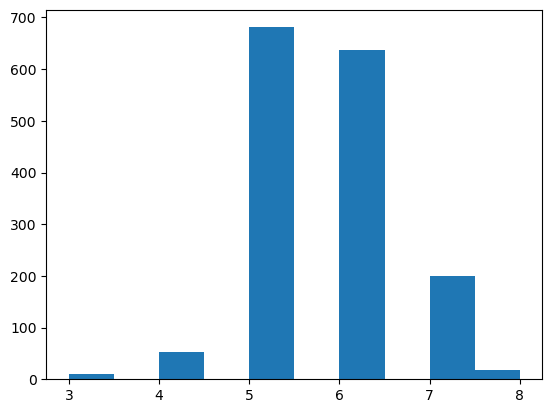

In [118]:
plt.hist(data.quality)

<Axes: xlabel='pH', ylabel='alcohol'>

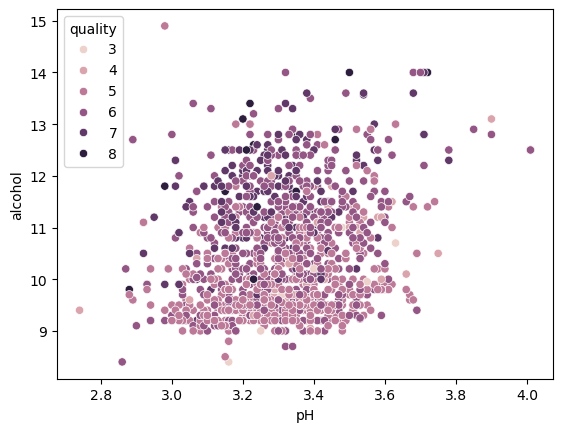

In [120]:
sns.scatterplot(x = "pH", y = "alcohol", hue = "quality", data = data)

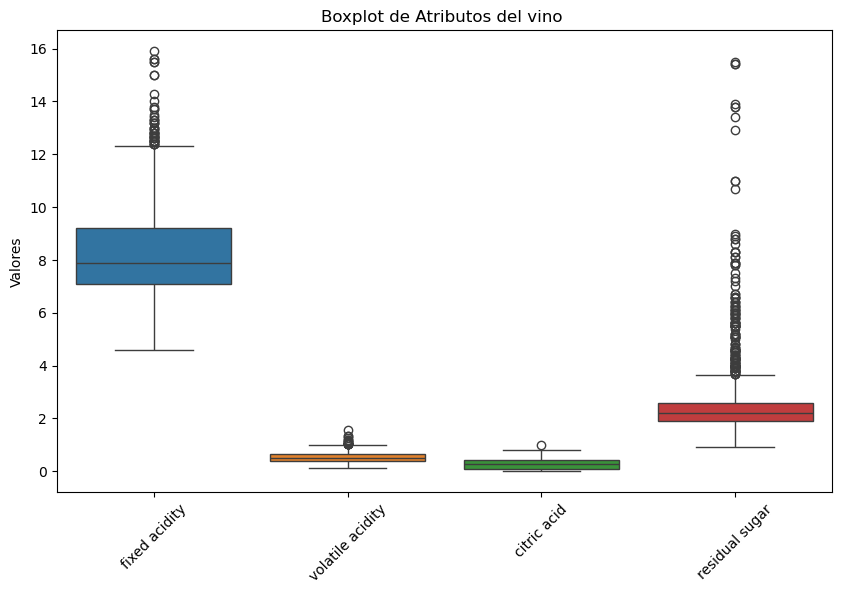

In [124]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['fixed acidity','volatile acidity','citric acid', 'residual sugar']]) 
plt.xticks(rotation=45)
plt.title('Boxplot de Atributos del vino ')
plt.ylabel('Valores')
plt.show()

In [154]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar"]
target_col = ['quality']

In [156]:
predictors = data[predictors_col]
target = data[target_col]

In [158]:

predictors

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.700,0.00,1.9
1,7.8,0.880,0.00,2.6
2,7.8,0.760,0.04,2.3
3,11.2,0.280,0.56,1.9
4,7.4,0.700,0.00,1.9
...,...,...,...,...
1594,6.2,0.600,0.08,2.0
1595,5.9,0.550,0.10,2.2
1596,6.3,0.510,0.13,2.3
1597,5.9,0.645,0.12,2.0


In [160]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar
fixed acidity,1.000000,-0.256131,0.671703,0.114777
volatile acidity,-0.256131,1.000000,-0.552496,0.001918
citric acid,0.671703,-0.552496,1.000000,0.143577
residual sugar,0.114777,0.001918,0.143577,1.000000


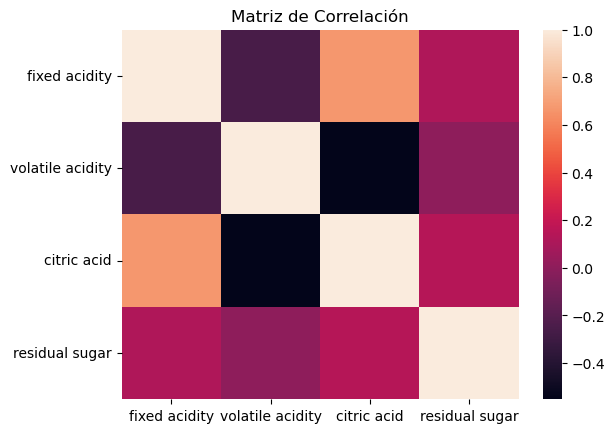

In [162]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [184]:
tree = DecisionTreeClassifier(max_depth=3)

In [186]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'x[1] <= 0.548\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.25, 0.625, 'x[1] <= 0.317\ngini = 0.649\nsamples = 699\nvalue = [1, 14, 210, 331, 133, 10]'),
 Text(0.125, 0.375, 'x[3] <= 1.65\ngini = 0.597\nsamples = 145\nvalue = [0, 1, 15, 73, 54, 2]'),
 Text(0.0625, 0.125, 'gini = 0.34\nsamples = 20\nvalue = [0, 0, 2, 16, 2, 0]'),
 Text(0.1875, 0.125, 'gini = 0.608\nsamples = 125\nvalue = [0, 1, 13, 57, 52, 2]'),
 Text(0.375, 0.375, 'x[3] <= 3.35\ngini = 0.638\nsamples = 554\nvalue = [1, 13, 195, 258, 79, 8]'),
 Text(0.3125, 0.125, 'gini = 0.617\nsamples = 483\nvalue = [1, 8, 173, 237, 57, 7]'),
 Text(0.4375, 0.125, 'gini = 0.715\nsamples = 71\nvalue = [0, 5, 22, 21, 22, 1]'),
 Text(0.75, 0.625, 'x[2] <= 0.095\ngini = 0.581\nsamples = 580\nvalue = [8, 31, 325, 183, 31, 2]'),
 Text(0.625, 0.375, 'x[1] <= 0.752\ngini = 0.638\nsamples = 269\nvalue = [7, 19, 125, 99, 18, 1]'),
 Text(0.5625, 0.125, 'gini = 0.585\nsamples = 198\nval

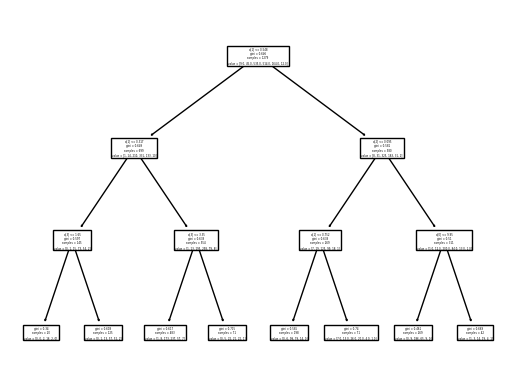

In [188]:
plot_tree(arbol)

In [190]:
predicciones = arbol.predict(X_test)

In [192]:
predicciones

array([6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6,

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

In [178]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.578125

In [180]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5845010867517226

In [194]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.43324633304572907

# Interpretar, analizar y documentar los resultados obtenidos

## Variable Analizadas

 Las variables presente en el conjunto de datos son:
 - Acides fija, Acidez volatil, Acido citrico, Azucar residual, Cloruro, Dioxido de azufre total, Densidad, pH, Sulfatos, Alcohol, y Calidad.

la variable objetivo (dependiente) es la calidad del vino, la cual esta siendo predicha en base a las demas caracteristicas

## Descripcion Estadistica del Dataset: 

Se realizo un analisis descriptivo mediante el comando "data.describe()". Este analisis premitio observar
- Media, desviacion estandar, valores minimos, maximos, y percentiles (25%, 50%, 75%) de cada variable
- Por ejemplo, la variable acidez fija tiene una media de alrededor de 8.32, con un valor maximo de 15.9 y minimo de 4.6 Mientras que la calidad promedio es de 5.64, con un rango de 3 a 8

## Valores Faltantes

- Mediante el comando "data.isna().sum(), se identifico que no hay valores faltantes en las variables analizadas, lo cual es buen indicador de calidad del conjuntos de datos

## Distribucion de la calidad del Vino:

El analisis de la variable calidad sugiere que la mayoria de los vinos tienen una calidad entre 5 y 6, lo cual corresponde a vinos de calidad media

Vinos con calidades Extrema (muy bajas o muy altas) son menos comunes, lo cual podria influir en la capacidad del modelo para predecir estos valores con precision.

# Analisis y Resultados

## tendencia y corrrelaciones

- Algunas variables como la acidez volatil podrian tener un impacto negativo en la calidad del vino, ya que vinos con mayor acidez volatil tienden a tener calidades mas bajas.
- Por otro lado, alcohol y sulfatos parecen estas correlacionados positivamente con la calidad, es decir, vinos con mayor contenido alcoholicos y niveles adecuados de sulfatos tienden a tener mejores calificaciones

## Variables atipicas

- se identificaron algunos valores atipicos en variables como los cloruros y el dioxido del azufre total, que presentan valores maximos bastante alejados de la mediana, lo cual podria indicar la necesidad de un tratamiento especial en estos casos

## Importancia de la limpieza de datos

- A pesar de que no hay valores faltantes, es importante considerar la normalizacion o estandarizacion de algunas variables antes de aplicar un modelo predictivo, especialmente en variables con amplias diferencias en escala (como los cloruros vs alcohol)

## Modelado y prediccion:

- Los proximos pasos recomendados serian dividir el conjunto de datos en Train y Test, entrenar un modelo de regresion logistica o de arboles de decision, y utlizar metricas como la precision, el recall, y el F1_score para evaluar el desempeño del modelo